# Haskell Mook Files - First look

## Load in json data

In [1]:
from json import loads

In [2]:
with open("logdata.json") as f:
    data = loads(f.readlines()[0])

Number of distinct users, according to the IP adresses

In [3]:
len(data)

3232

## Analysis Preamble

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from collections import Counter
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

## Number  of lines of code written  per user

In [5]:
nCodeLines = []
for user in data:
    nCodeLines.append(len(data[user]))

In [6]:
histData = np.histogram(nCodeLines, np.arange(min(nCodeLines),max(nCodeLines)+1))
histData

(array([ 3,  4,  6,  7,  8, 11, 18, 12, 23, 30, 28, 32, 24, 34, 41, 34, 48,
        41, 36, 46, 43, 61, 52, 53, 46, 57, 50, 46, 43, 52, 47, 48, 37, 51,
        48, 52, 57, 45, 56, 51, 38, 53, 61, 37, 52, 47, 38, 47, 35, 38, 39,
        46, 39, 44, 41, 29, 46, 37, 46, 33, 30, 36, 39, 20, 32, 20, 31, 42,
        25, 24, 30, 26, 20, 11, 22, 24, 23, 12, 16, 12, 19, 10, 17, 17, 14,
        15, 16, 12,  6, 10, 13,  7, 18,  9, 10, 14,  5,  9,  6,  6,  7,  2,
         2, 10,  5,  6,  7,  5,  7,  8,  6,  5,  4,  2,  8,  4,  4,  2,  2,
         5,  0,  2,  1,  4,  0,  3,  0,  5,  2,  4,  1,  3,  1,  3,  2,  0,
         0,  1,  2,  2,  0,  0,  1,  0,  2,  0,  2,  2,  2,  0,  0,  2,  2,
         0,  0,  1,  0,  1,  1,  2,  1,  2,  1,  0,  0,  0,  0,  0,  2,  0,
         0,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0, 

Text(0.5,0,'Number of Haskell Expressions Writtern')

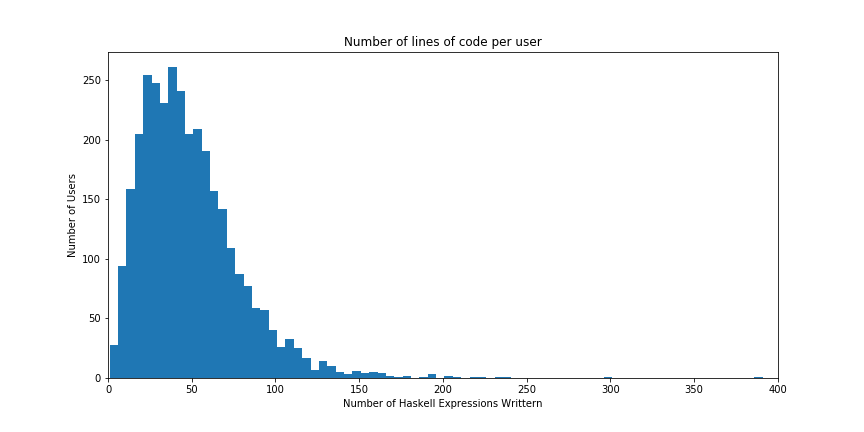

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(nCodeLines, bins=np.arange(1,400,5))
ax.set_xlim(0,400)
ax.set_title("Number of lines of code per user")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Haskell Expressions Writtern")

## Test for Repeated Input

In [8]:
nAllUnique = 0
for user in data:
    inputs = []
    for record in data[user]:
        inputs.append(record['input'])
    if len(inputs) == len(set(inputs)):
        nAllUnique += 1

print("number of only unique entries captured per user: {0}. Number of users: {1}".format(nAllUnique, len(data)))

number of only unique entries captured per user: 760. Number of users: 3232


([<matplotlib.patches.Wedge at 0x7f15f6c76470>,
 [Text(0.813249,0.740693,'Only unique entries for user'),
  Text(-0.813249,-0.740693,'Repeating inputs for same user')])

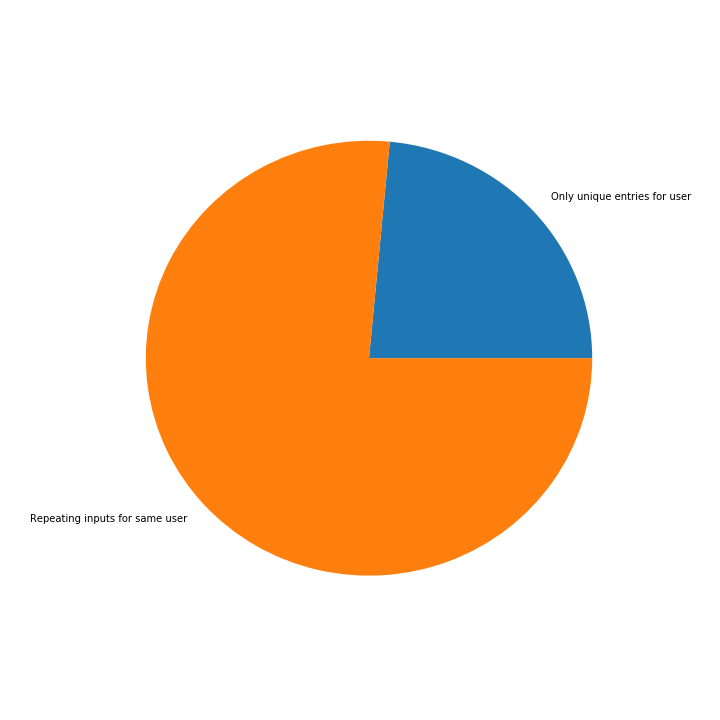

In [9]:
fix, ax = plt.subplots(figsize=(10,10))
ax.pie([nAllUnique, len(data)-nAllUnique], labels=["Only unique entries for user", "Repeating inputs for same user"])

Possibly suggesting that the input for each user is not coming from the same person, as it is unlikely that the user will enter the same values twice. However, it may also be possible that users are typing the same input repeatedly, for example if they feel as though the MOOC response is too slow.

## Number of Unique Lines of Code

In [15]:
nUniqueLines = []
for user in data:
    inputs = []
    for record in data[user]:
        inputs.append(record['input'])
    nUniqueLines.append(len(set(inputs)))

max(np.subtract(nCodeLines,nUniqueLines))

149

In [11]:
uniqueHistData = np.histogram(nUniqueLines, np.arange(min(nUniqueLines),max(nUniqueLines)+1))
uniqueHistData

(array([ 3,  7,  5,  8,  6, 14, 20, 13, 26, 35, 35, 27, 29, 39, 45, 36, 52,
        43, 48, 49, 58, 65, 55, 50, 48, 56, 53, 50, 54, 54, 54, 55, 45, 51,
        58, 47, 61, 52, 55, 60, 50, 51, 57, 50, 53, 43, 47, 37, 52, 40, 59,
        35, 47, 41, 48, 42, 37, 31, 31, 35, 29, 41, 34, 34, 35, 30, 20, 19,
        17, 17, 23, 19, 21, 17, 16, 17,  7, 18, 20, 12, 18, 10, 14, 14,  6,
        14, 11,  7,  7,  7, 11,  7,  6,  8,  6,  8, 11,  6,  6,  2,  2,  5,
         4,  4,  6,  1,  4,  4,  6,  3,  3,  2,  6,  5,  0,  4,  1,  2,  0,
         1,  0,  3,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  0,  3,
         2,  0,  0,  1,  4,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,  1,
         1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0, 

Text(0.5,0,'Number of Haskell Expressions Writtern')

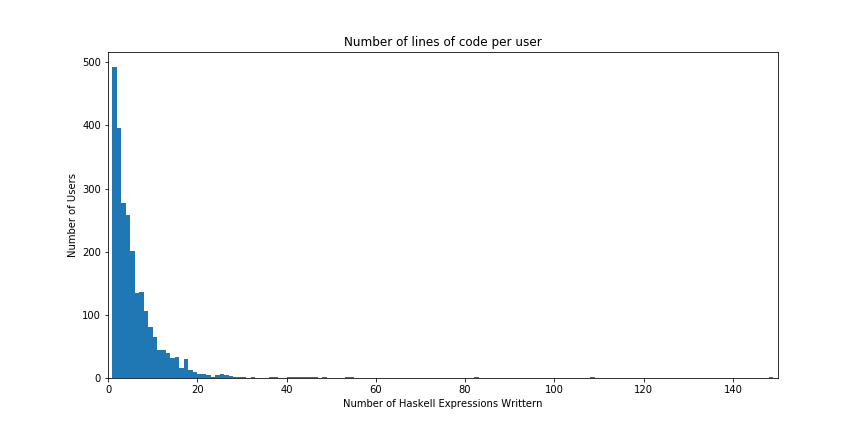

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(np.subtract(nCodeLines,nUniqueLines), bins=np.arange(1,150,1))
ax.set_xlim(0,150)
ax.set_title("Number of lines of code per user")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Haskell Expressions Writtern")

### The users with > 20 non-unique lines of input

In [33]:
for user, nUnique in zip(data.keys(), np.subtract(nCodeLines,nUniqueLines)):
    if nUnique > 20:
        print("User ID: {} Number of repeated lines: {}".format(user, nUnique))

User ID: 4 Number of repeated lines: 149
User ID: 12 Number of repeated lines: 24
User ID: 46 Number of repeated lines: 48
User ID: 59 Number of repeated lines: 43
User ID: 67 Number of repeated lines: 29
User ID: 71 Number of repeated lines: 27
User ID: 75 Number of repeated lines: 25
User ID: 79 Number of repeated lines: 21
User ID: 95 Number of repeated lines: 36
User ID: 107 Number of repeated lines: 23
User ID: 109 Number of repeated lines: 32
User ID: 110 Number of repeated lines: 108
User ID: 206 Number of repeated lines: 40
User ID: 211 Number of repeated lines: 41
User ID: 212 Number of repeated lines: 40
User ID: 221 Number of repeated lines: 46
User ID: 222 Number of repeated lines: 44
User ID: 290 Number of repeated lines: 25
User ID: 292 Number of repeated lines: 22
User ID: 299 Number of repeated lines: 43
User ID: 308 Number of repeated lines: 42
User ID: 324 Number of repeated lines: 27
User ID: 327 Number of repeated lines: 26
User ID: 343 Number of repeated lines: 22


In [54]:
Counter([a['input'] for a in data['4']]).most_common(15)

[('getLine', 9),
 ('do { putStrLn "what is your name?"; x <- getLine; putStrLn ("hello " ++ x) }',
  9),
 ('let {sum xs  =  foldr (+) 0 xs;product xs  =  foldr (*) 1 xs } in foldl (\\acc elt -> elt:acc) "" "Reversing a string"',
  7),
 ('do { putStrLn "what is your name?"; n<-getLine; let nUpper = map toUpper n in putStrLn ("HELLO " ++ nUpper) }',
  6),
 ('putStrLn (show (6*7))', 6),
 ('read "42" :: Int', 6),
 ('let { } in foldl (\\acc elt -> elt:acc) "" "Reversing a string"', 6),
 ('let { } in not (not False)', 5),
 ('putStrLn ("good " ++ "morning" ++ " everyone")', 5),
 ('let { } in filter (<5) [3,9,2,12,6,4]', 5),
 ('do line <- getLine; putStrLn line', 4),
 ('let { } in True || False', 4),
 ('let { } in True `xor` False', 4),
 ('let { } in not True', 4),
 ('show 42', 4)]

In [49]:
data['4'][0]['timestamp'][:10]

'2016-09-21'

<BarContainer object of 11 artists>

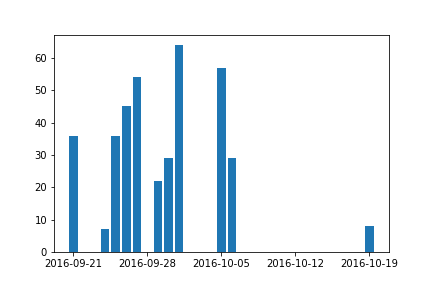

In [65]:
user4times = []
for ob in data['4']:
    user4times.append(datetime.datetime.strptime(ob['timestamp'][:10], "%Y-%m-%d").date())

plt.bar(Counter(user4times).keys(),Counter(user4times).values())

## Timeline of MOOC

In [81]:
timestamps = []
for user in data:
    temp = []
    for obj in data[user]:
        temp.append(datetime.datetime.strptime(obj['timestamp'][:10], "%Y-%m-%d").date())
    timestamps.extend(set(temp))

In [82]:
dateCount = Counter(timestamps)

Text(0.5,0,'Date')

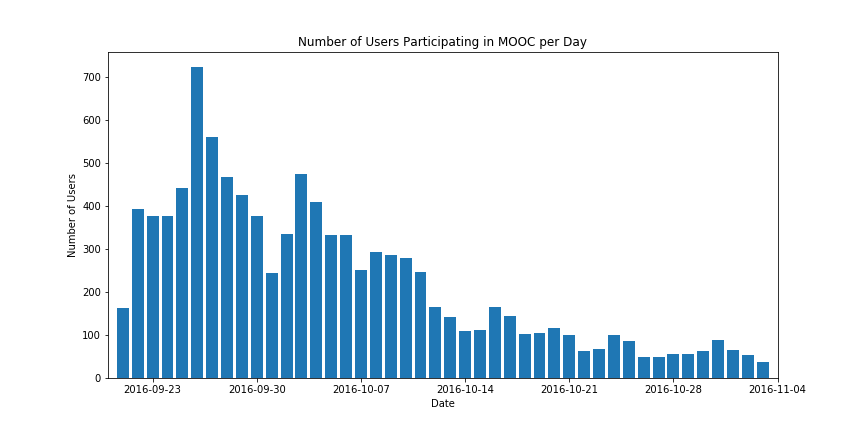

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(dateCount.keys(), dateCount.values())
ax.set_xlim(min(dateCount.keys())-datetime.timedelta(1), max(dateCount.keys())+datetime.timedelta(1))
ax.set_title("Number of Users Participating in MOOC per Day")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Date")

Interestingly, Monday is the most popular day